# Programa para detectar contornos y extraer información
## Utilizaremos la siguiente imagen:
![imagen](20.png)

In [1]:
from math import sqrt
from skimage import io
from skimage import color
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
import statistics as stats
import pandas as pd
import numpy as np

c:\users\mauricio de la torre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  import sys


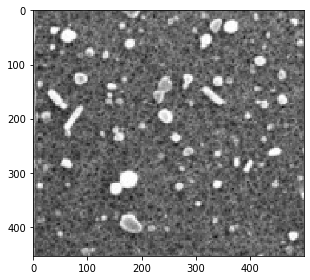

In [2]:
####################################
#          Cargar imagen 
####################################

image = io.imread('20.png')[0:500, 0:500]
#image_gray = rgb2gray(rgba2rgb(image))
image_gray = rgb2gray(image)

#mostrar imagen original 
io.imshow(image)
io.show()

## Metodos a utilizar:

- Laplaciano del Gaussiano 
- Diferencia de gaussianos 
- Determinante matriz Hessiana

In [3]:
#Laplaciano del Gaussiano
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

#Diferencia de gaussianos
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

#Determinante matriz Hessiana
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

## Agrupamos los tres metodos y creamos la gráfica

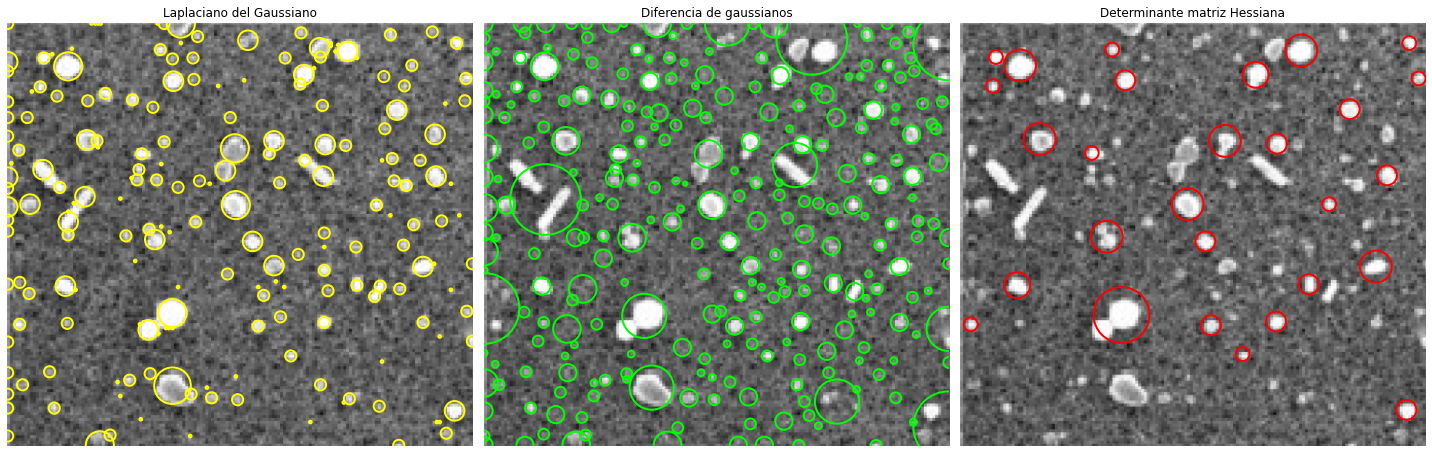

In [4]:
blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplaciano del Gaussiano', 'Diferencia de gaussianos',
          'Determinante matriz Hessiana']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(20, 13), sharex=True, sharey=True)
ax = axes.ravel()

radio =[] #Arreglo para guardar los radios

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
        
        if idx == 0:  #Guarda radios, 0 para log, 1 para dog, 2 para doh       
                radio.append(r) #Radios
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()   


In [5]:
#print(radio)

In [6]:
R = sorted(radio)
print(R)

[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951,

In [7]:
Raa = pd.DataFrame(radio) 

Raa.quantile([.25, .5, .83, .90])

,0
0.25,1.414214
0.50,5.971124
0.83,8.295148
0.90,10.528034


In [8]:
A = 1.414214
B = 5.971124
C = 8.295148
D = 10.528034

In [9]:
R25 = 0
R50 = 0
R83 = 0
R100 = 0
for i in radio:
    if i <= A:
        R25 = R25 +1
    if i > A and i <= B:
        R50 = R50 +1
    if i > B and i <= C:
        R83 = R83 +1
    if i > D:
        R100 = R100 +1    

In [10]:
Total = R25 + R50  + R100
print('El total de semillas es: ', Total)
print('El promedio de radios es:', stats.mean(radio))

print('Existe un total de:',R25,'semillas en el 25% más pequeño')
print('Existe un total de:',R50,'semillas entre el 25% y 50% más pequeño')
print('Existe un total de:',R100,'semillas con tamaño superior al promedio')



El total de semillas es:  198
El promedio de radios es: 5.602888748795763
Existe un total de: 58 semillas en el 25% más pequeño
Existe un total de: 106 semillas entre el 25% y 50% más pequeño
Existe un total de: 34 semillas con tamaño superior al promedio


## Contador de elementos (radios)

In [11]:
Ra = 0

for i in radio:
    Ra = Ra + 1

In [12]:
print('El número de semillas es: ', Ra )
print('El promedio de radios es:', stats.mean(radio)) 
#print('La moda es: ', stats.mode(radio))
print('La varianza es: ', stats.pvariance(radio))
print('La desviación estándar es: ', stats.pstdev(radio))



El número de semillas es:  198
El promedio de radios es: 5.602888748795763
La varianza es:  12.23976137481562
La desviación estándar es:  3.4985370335063797
